In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


import seaborn as sns
import scipy as sp
from scipy import stats # statistics
from mpl_toolkits.mplot3d import Axes3D, axes3d


from matplotlib.colors import ListedColormap

# import mglearn

from sklearn.datasets import make_blobs #random 한 데이터 묶음을 만들어 줌.
from sklearn.model_selection import train_test_split
from sklearn import datasets, preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM

In [3]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.6'

In [4]:
df_KOSPI_price_naver = fdr.DataReader('035420', '20021029','20200101')
df_KOSPI_price_naver.rename(columns = {'Date':'일자','Open':'시가','High':'고가','Low':'저가','Close':'종가','Volume':'거래량','Change':'수익률'}, inplace=True)
df_KOSPI_price_naver = df_KOSPI_price_naver.reset_index()
df_KOSPI_price_naver = df_KOSPI_price_naver.dropna(axis=0)
df_KOSPI_price_naver

,Date,시가,고가,저가,종가,거래량,수익률
1,2002-10-30,8244,8244,8152,8245,853638,0.119332
2,2002-10-31,8369,8570,7641,7835,1320880,-0.049727
3,2002-11-01,8036,8287,7065,7349,750761,-0.062029
4,2002-11-04,7281,7331,6804,6981,692165,-0.050075
5,2002-11-05,6946,7315,6946,6973,627360,-0.001146
...,...,...,...,...,...,...,...
4243,2019-12-23,185000,185500,182000,184000,250256,0.002725
4244,2019-12-24,184000,184000,179000,182000,193440,-0.010870
4245,2019-12-26,181500,183000,179000,180500,173426,-0.008242
4246,2019-12-27,182000,185000,179000,183500,323473,0.016620


In [5]:
df_KOSPI_price_naver.rename(columns = {'Date':'일자'}, inplace=True)

df_KOSPI_price_naver

,일자,시가,고가,저가,종가,거래량,수익률
1,2002-10-30,8244,8244,8152,8245,853638,0.119332
2,2002-10-31,8369,8570,7641,7835,1320880,-0.049727
3,2002-11-01,8036,8287,7065,7349,750761,-0.062029
4,2002-11-04,7281,7331,6804,6981,692165,-0.050075
5,2002-11-05,6946,7315,6946,6973,627360,-0.001146
...,...,...,...,...,...,...,...
4243,2019-12-23,185000,185500,182000,184000,250256,0.002725
4244,2019-12-24,184000,184000,179000,182000,193440,-0.010870
4245,2019-12-26,181500,183000,179000,180500,173426,-0.008242
4246,2019-12-27,182000,185000,179000,183500,323473,0.016620


In [6]:
pd.to_datetime(df_KOSPI_price_naver['일자'], format='%Y%m%d')
# 0      2020-01-07
# 1      2020-01-06
# 2      2020-01-03
# 3      2020-01-02
# 4      2019-12-30

df_KOSPI_price_naver['일자'] = pd.to_datetime(df_KOSPI_price_naver['일자'], format='%Y%m%d')
df_KOSPI_price_naver['연도'] =df_KOSPI_price_naver['일자'].dt.year
df_KOSPI_price_naver['월'] =df_KOSPI_price_naver['일자'].dt.month
df_KOSPI_price_naver['일'] =df_KOSPI_price_naver['일자'].dt.day

In [7]:
df_KOSPI_price_naver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4247 entries, 1 to 4247
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      4247 non-null   datetime64[ns]
 1   시가      4247 non-null   int64         
 2   고가      4247 non-null   int64         
 3   저가      4247 non-null   int64         
 4   종가      4247 non-null   int64         
 5   거래량     4247 non-null   int64         
 6   수익률     4247 non-null   float64       
 7   연도      4247 non-null   int64         
 8   월       4247 non-null   int64         
 9   일       4247 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 365.0 KB


In [8]:
df_KOSPI_price_naver

,일자,시가,고가,저가,종가,거래량,수익률,연도,월,일
1,2002-10-30,8244,8244,8152,8245,853638,0.119332,2002,10,30
2,2002-10-31,8369,8570,7641,7835,1320880,-0.049727,2002,10,31
3,2002-11-01,8036,8287,7065,7349,750761,-0.062029,2002,11,1
4,2002-11-04,7281,7331,6804,6981,692165,-0.050075,2002,11,4
5,2002-11-05,6946,7315,6946,6973,627360,-0.001146,2002,11,5
...,...,...,...,...,...,...,...,...,...,...
4243,2019-12-23,185000,185500,182000,184000,250256,0.002725,2019,12,23
4244,2019-12-24,184000,184000,179000,182000,193440,-0.010870,2019,12,24
4245,2019-12-26,181500,183000,179000,180500,173426,-0.008242,2019,12,26
4246,2019-12-27,182000,185000,179000,183500,323473,0.016620,2019,12,27


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['시가', '고가', '저가', '종가', '거래량','수익률']
df_KOSPI_price_naver_scaled = scaler.fit_transform(df_KOSPI_price_naver[scale_cols])

df_KOSPI_price_naver_scaled = pd.DataFrame(df_KOSPI_price_naver_scaled)
df_KOSPI_price_naver_scaled.columns = scale_cols

print(df_KOSPI_price_naver_scaled)

            시가        고가        저가        종가       거래량       수익률
0     0.027946  0.027480  0.028908  0.007332  0.160927  0.967306
1     0.028369  0.028567  0.027096  0.005913  0.249010  0.760185
2     0.027241  0.027623  0.025053  0.004230  0.141532  0.745113
3     0.024681  0.024437  0.024128  0.002956  0.130486  0.759759
4     0.023546  0.024383  0.024631  0.002929  0.118269  0.819704
...        ...       ...       ...       ...       ...       ...
4242  0.627119  0.618333  0.645390  0.615748  0.047178  0.824446
4243  0.623729  0.613333  0.634752  0.608825  0.036467  0.807791
4244  0.615254  0.610000  0.634752  0.603632  0.032694  0.811010
4245  0.616949  0.616667  0.634752  0.614017  0.060981  0.841470
4246  0.622034  0.633333  0.650709  0.624402  0.070985  0.841137

[4247 rows x 6 columns]


In [13]:
TEST_SIZE = 200

In [14]:
train = df_KOSPI_price_naver_scaled[:-TEST_SIZE]
test = df_KOSPI_price_naver_scaled[-TEST_SIZE:]

In [15]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [16]:
feature_cols = ['시가', '고가', '저가', '거래량','수익률']
label_cols = ['종가']

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape
# ((6086, 20, 4), (1522, 20, 4))

# test dataset (실제 예측 해볼 데이터)
# test_feature, test_label = make_dataset(test_feature, test_label, 20)
# test_feature.shape, test_label.shape
# ((180, 20, 4), (180, 1))

((3221, 20, 5), (806, 20, 5))

In [17]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((180, 20, 5), (180, 1))

In [18]:
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = 'checkpoint-epoch-batch-trial-001.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Instructions for updating:
Use tf.cast instead.
Train on 3221 samples, validate on 806 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
3216/3221 [============================>.] - ETA: 0s - loss: 0.0035
Epoch 00001: val_loss improved from inf to 0.00070, saving model to checkpoint-epoch-batch-trial-001.h5
3221/3221 [==============================] - 9s 3ms/sample - loss: 0.0035 - val_loss: 6.9656e-04
Epoch 2/200
3216/3221 [============================>.] - ETA: 0s - loss: 6.0520e-04
Epoch 00002: val_loss improved from 0.00070 to 0.00053, saving model to checkpoint-epoch-batch-trial-001.h5
3221/3221 [==============================] - 7s 2ms/sample - loss: 6.0567e-04 - val_loss: 5.2811e-04
Epoch 3/200
3216/3221 [============================>.] - ETA: 0s - loss: 4.7601e-04
Epoch 00003: val_loss improved from 0.00053 to 0.00040, saving model to checkpoint-epoch-batch-trial-001.h5
3221/3221 [==============================] - 7s 2ms/sample - loss: 4.7537e-04 - val_loss: 3

In [20]:
model.load_weights(filename)

In [21]:
pred = model.predict(test_feature)
len(pred)
#print(pred)

180

In [22]:
scaler.data_min_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.12700000e+03,
        0.00000000e+00, -6.70214408e-01])

In [23]:
scaler.data_max_

array([2.95000000e+05, 3.00000000e+05, 2.82000000e+05, 2.95000000e+05,
       5.30451900e+06, 1.46017699e-01])

In [24]:
# 8245
# 0.007332  
(8245 - 6127)/(295000 - 6127)

0.00733194171833297

In [25]:
 ( 0.007332  * (295000 - 6127) ) +  6127

8245.016835999999

In [28]:
(pred[1479] * (295000 - 6127) ) +  6127

IndexError: index 1479 is out of bounds for axis 0 with size 180

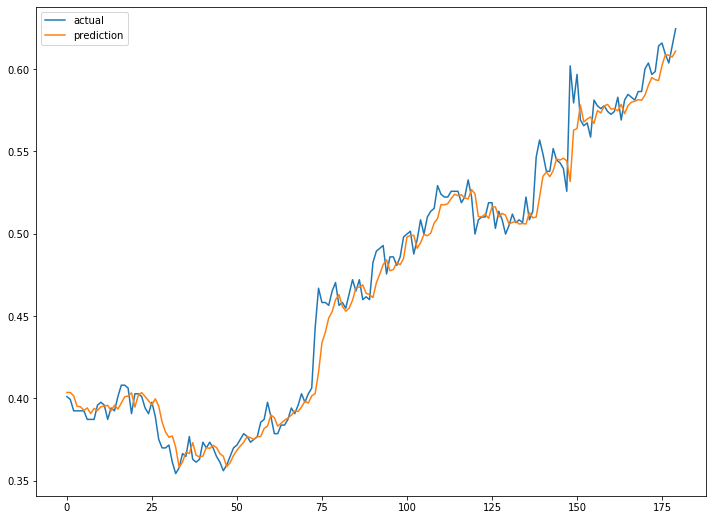

In [27]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()